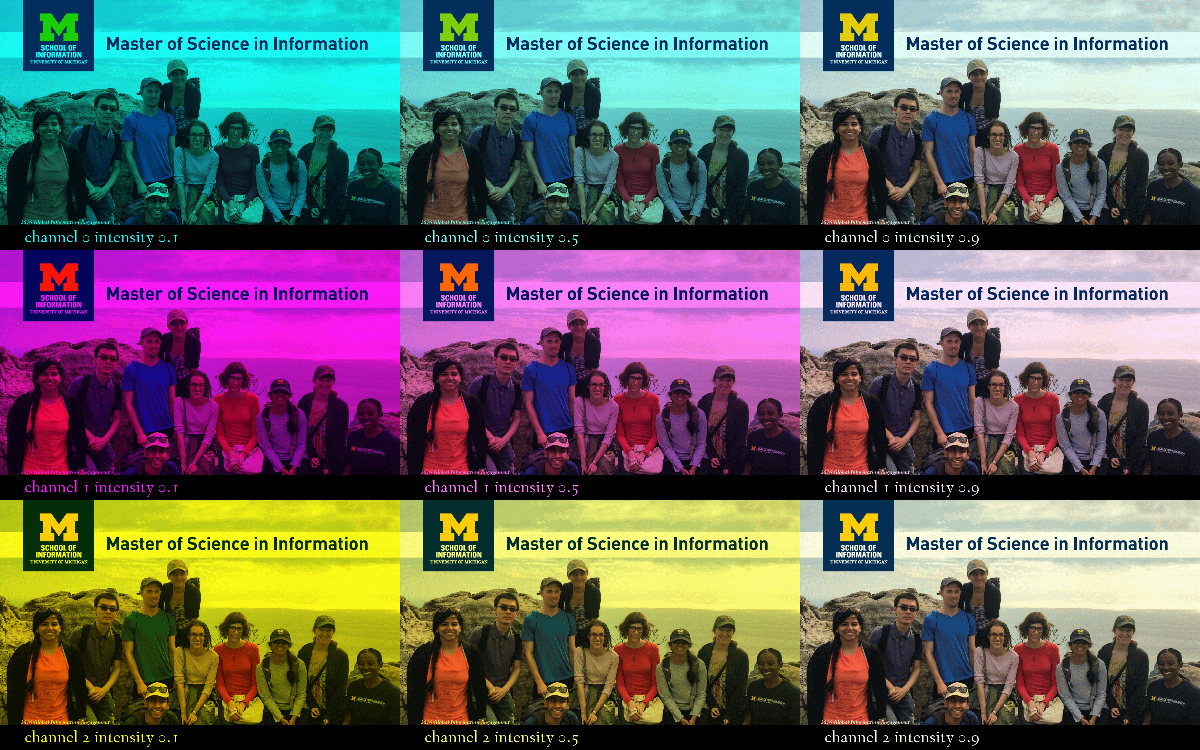

In [10]:
# Pull in the necessary modules first
import PIL
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# Load the image and convert it to RGB 
file = "readonly/msi_recruitment.gif"
raw_image = Image.open(file).convert('RGB')

# Create images list used for later
images = []

for i in range(0,9):
    out = PIL.Image.new(raw_image.mode, (800, 500))
    out.paste(raw_image, (0,0))
    images.append(out)

factors = [0.1, 0.5, 0.9]
fnt = ImageFont.truetype("readonly/fanwood-webfont.ttf", 35)

# Write label at the bottom black ribbon
for i in range(0,9):
    draw = ImageDraw.Draw(images[i])
    char = "channel {} intensity {}".format(i//3, factors[i%3])
    draw.text((50, 460), char, font = fnt)

# Adjust three color channels

new_images = []

for x in range(0,3):
    r, g, b = images[x].split()
    rx = r.point(lambda i: i * factors[x])
    new_images.append(Image.merge('RGB', (rx, g, b)))

for x in range(3,6):
    r, g, b = images[x].split()
    gx = g.point(lambda i: i * factors[x%3])
    new_images.append(Image.merge('RGB', (r, gx, b)))

for x in range(6,9):
    r, g, b = images[x].split()
    bx = b.point(lambda i: i * factors[x%3])
    new_images.append(Image.merge('RGB', (r, g, bx)))

    # Make a canvas for layout
first_image = new_images[0]
contact_sheet = PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x = 0
y = 0
for img in new_images:
    contact_sheet.paste(img, (x, y) )
    
    # Now we update our X position
    if x + first_image.width == contact_sheet.width:
        x = 0
        y = y + first_image.height
    else:
        x = x + first_image.width

# Resize the contact sheet for display
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))

# Display that composite image
display(contact_sheet)

    